In [1]:
import os
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms

from activation.acts import get_activations,SCiU
from util.utils import vis_activations
from data.datasets import MNIST,CIFAR10, CIFAR100
from model.models import *
from experiment import Trainer,ModelCard

In [2]:
# ./activation/acts.py
acts = get_activations(return_type='dict')
acts.update({
    'ReLU':nn.ReLU(),
    # 'SCiU_square':SCiU(pos_multiplier=1,
    #                     neg_multiplier=1,
    #                     clip_max=1,
    #                     clip_min=-1),
})
acts

{'sASN': sASN(),
 'ASN': ASN(),
 'GELU': GELU(approximate='none'),
 'ELU': ELU(alpha=1),
 'SiLU': SiLU(),
 'Swish': Swish(),
 'Mish': Mish(),
 'Softplus': Softplus(beta=1, threshold=20),
 'sSigmoid': sSigmoid(),
 'sSigmoid_tbx': sSigmoid_tbx(),
 'SoftModulusQ': SoftModulusQ(),
 'Modulus': Modulus(),
 'ReLU': ReLU()}

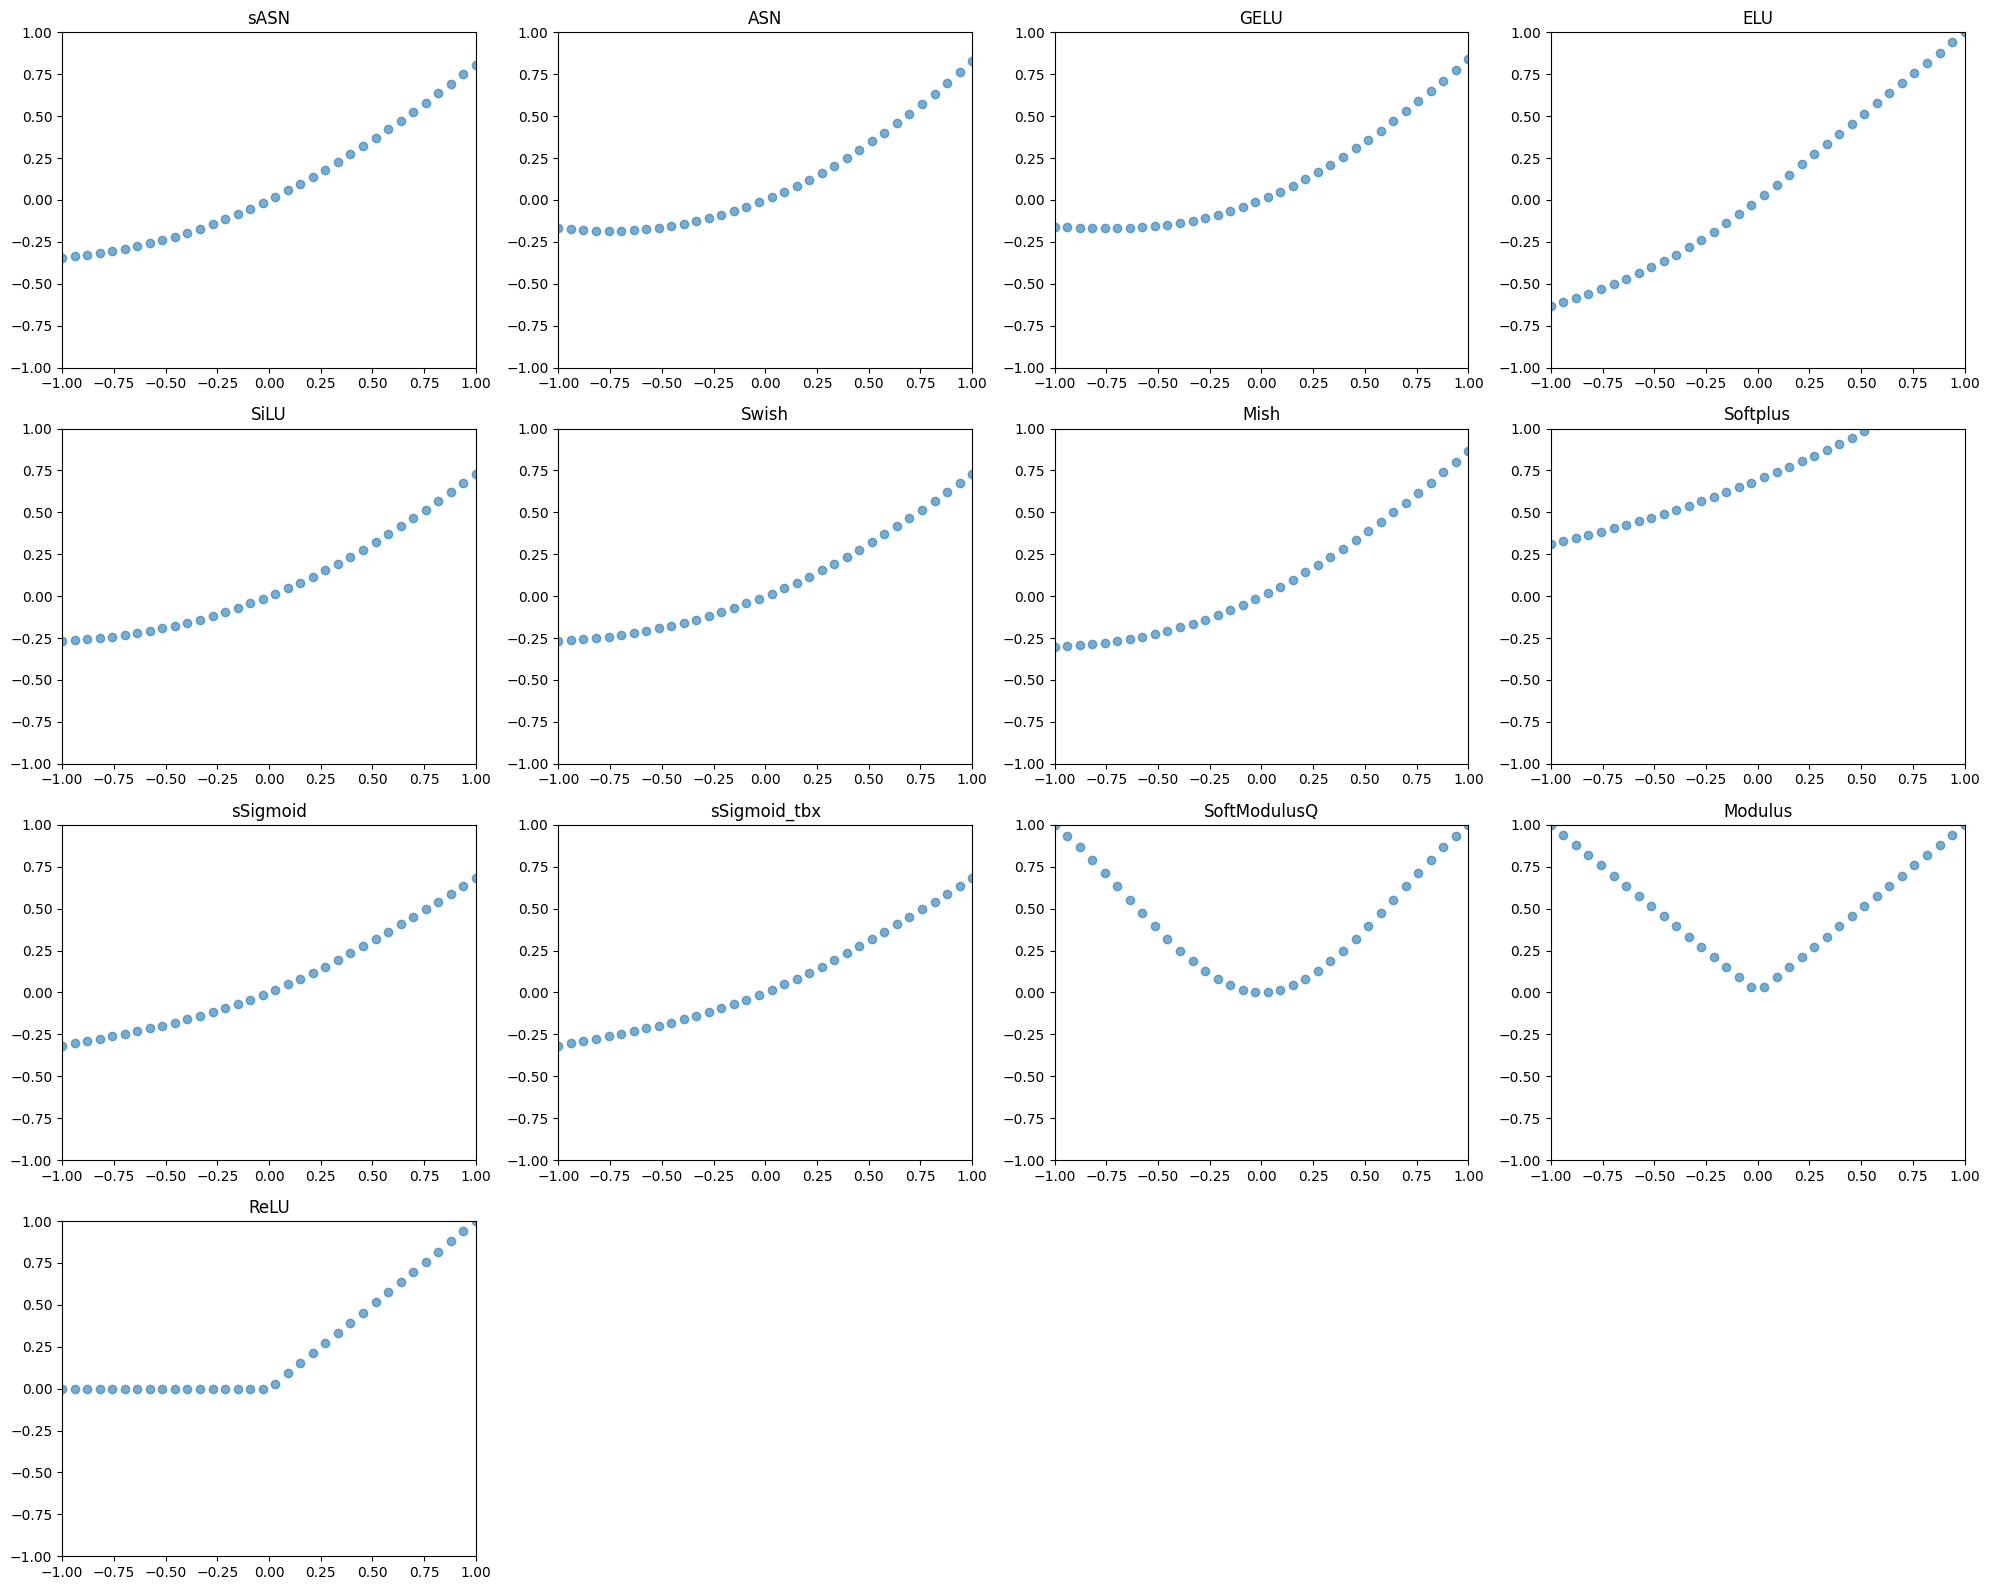

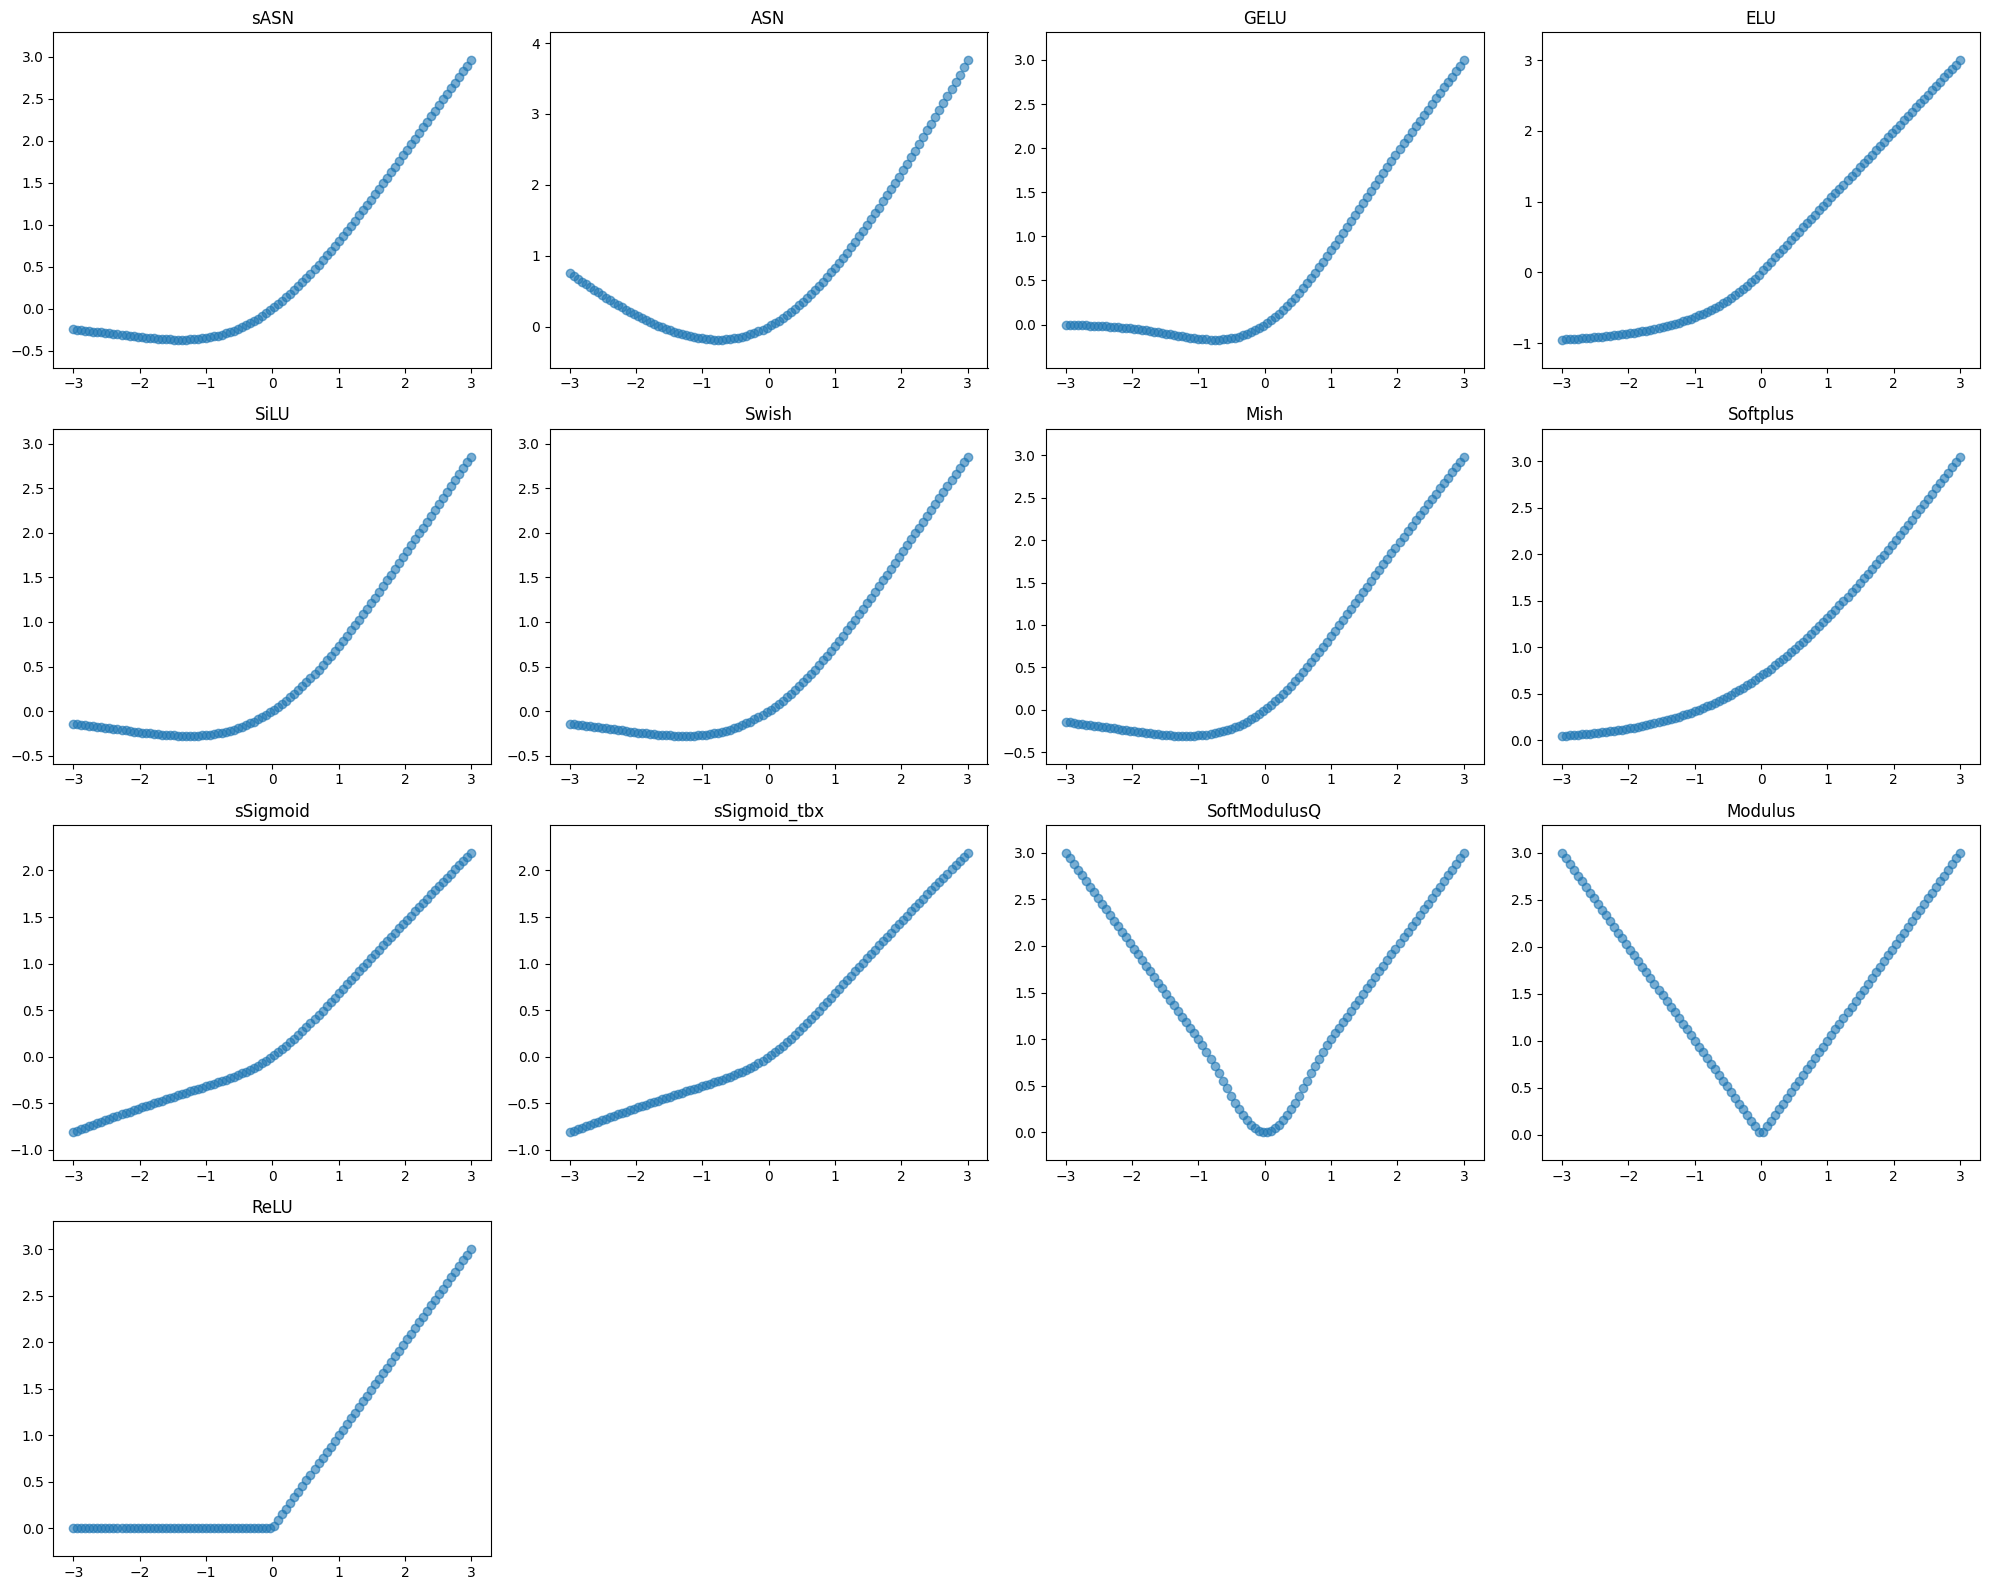

In [3]:
# visualize activation functions
x = torch.linspace(-3, 3, 100)

vis_activations(acts.values(), x, cols=4,xlim=[-1,1],ylim=[-1,1])
vis_activations(acts.values(), x, cols=4)


### Global Config

In [7]:
#
num_epochs = 50
learning_rate = 0.01
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD
optimizer_kwargs= {'lr':learning_rate, 'momentum':0.9, 'weight_decay':5e-4} # SGD
#
experiments_dir='./results/test1'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


cuda:0


### MNIST
- class :  0~9 
- shape : (1, 28, 28)
- train : 60,000 samples
- test : 10,000 samples
- transform : toTensor()

In [11]:
train_dataset = MNIST(train=True)
test_dataset = MNIST(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)

In [ ]:
# # model : gMLP todo
# model_kwargs = {
#     'name':'gMLP',
#     'input_size': 32,
#     'in_channel': 3,
#     'n_classes': 100,
#     'patch_size':16,
#     'dim':256,
#     'depth':18
# }

# model_card = ModelCard(gml,**model_kwargs)
# trainer = Trainer(model_card=model_card,
#                   data_loader=train_loader,
#                   test_loader=test_loader,
#                   criterion=criterion,
#                   optimizer=optimizer,
#                   optimizer_kwargs= optimizer_kwargs,
#                   device=device)

# trainer.run_pipline(acts,
#                     num_epochs=num_epochs,
#                     experiments_dir=os.path.join(experiments_dir+'/cifar100_gMLP',model_card.name))


{'input_size': 784, 'hidden_size': 128, 'num_classes': 10}
{'input_size': 784, 'hidden_size': 128, 'num_classes': 10, 'activation': sASN()}
Training with sASN activation function...
Epoch [1/50], Test Loss: 2.2516, Test Accuracy: 45.02%
Epoch [2/50], Test Loss: 2.1244, Test Accuracy: 58.36%
Epoch [3/50], Test Loss: 1.6986, Test Accuracy: 62.64%
Epoch [4/50], Test Loss: 0.8949, Test Accuracy: 78.34%
Epoch [5/50], Test Loss: 0.6047, Test Accuracy: 82.86%
Epoch [6/50], Test Loss: 0.4871, Test Accuracy: 86.24%
Epoch [7/50], Test Loss: 0.4263, Test Accuracy: 87.96%
Epoch [8/50], Test Loss: 0.3892, Test Accuracy: 89.00%
Epoch [9/50], Test Loss: 0.3668, Test Accuracy: 89.50%
Epoch [10/50], Test Loss: 0.3500, Test Accuracy: 89.95%
Epoch [11/50], Test Loss: 0.3386, Test Accuracy: 90.24%
Epoch [12/50], Test Loss: 0.3270, Test Accuracy: 90.48%
Epoch [13/50], Test Loss: 0.3167, Test Accuracy: 90.89%
Epoch [14/50], Test Loss: 0.3115, Test Accuracy: 91.16%
Epoch [15/50], Test Loss: 0.3033, Test Accu

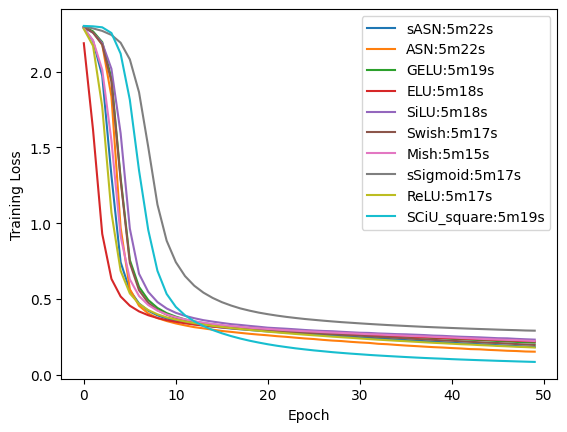

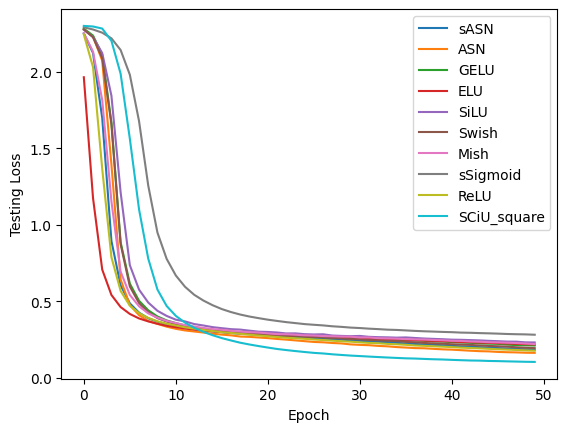

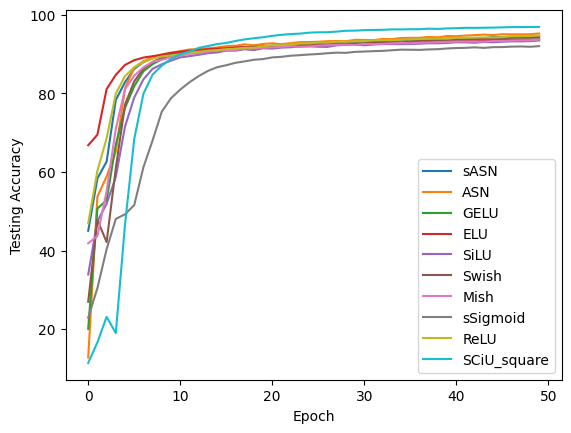

In [12]:
# model : BasicMLP
model_kwargs = {
    'input_size': 784,
    'hidden_size': 128,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))

In [ ]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 28,
    'in_channel': 1,
    'n_classes': 10,
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))


### CIFAR10
- class :  0~9 
- shape : (3, 32, 32)
- train : 50,000
- test : 10,000
- transform : toTensor()

In [7]:
from torchvision import transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = CIFAR10(train=True,transform=transform_train)
test_dataset = CIFAR10(train=False,transform=transform_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True,num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False,num_workers=2)

{'input_size': 3072, 'hidden_size': 76, 'num_classes': 10}
{'input_size': 3072, 'hidden_size': 76, 'num_classes': 10, 'activation': sASN()}
Training with sASN activation function...


Epoch [1/50], Test Loss: 2.0499, Test Accuracy: 28.29%
Epoch [2/50], Test Loss: 1.9276, Test Accuracy: 32.49%
Epoch [3/50], Test Loss: 1.8647, Test Accuracy: 35.24%
Epoch [4/50], Test Loss: 1.8168, Test Accuracy: 36.75%
Epoch [5/50], Test Loss: 1.7710, Test Accuracy: 38.68%
Epoch [6/50], Test Loss: 1.7377, Test Accuracy: 39.37%
Epoch [7/50], Test Loss: 1.7137, Test Accuracy: 40.14%
Epoch [8/50], Test Loss: 1.6927, Test Accuracy: 40.37%
Epoch [9/50], Test Loss: 1.6713, Test Accuracy: 40.95%
Epoch [10/50], Test Loss: 1.6527, Test Accuracy: 41.45%
Epoch [11/50], Test Loss: 1.6418, Test Accuracy: 41.93%
Epoch [12/50], Test Loss: 1.6281, Test Accuracy: 42.53%
Epoch [13/50], Test Loss: 1.6186, Test Accuracy: 42.50%
Epoch [14/50], Test Loss: 1.6145, Test Accuracy: 42.39%
Epoch [15/50], Test Loss: 1.5988, Test Accuracy: 42.49%
Epoch [16/50], Test Loss: 1.5986, Test Accuracy: 43.04%
Epoch [17/50], Test Loss: 1.5794, Test Accuracy: 43.84%
Epoch [18/50], Test Loss: 1.5739, Test Accuracy: 43.62%
E

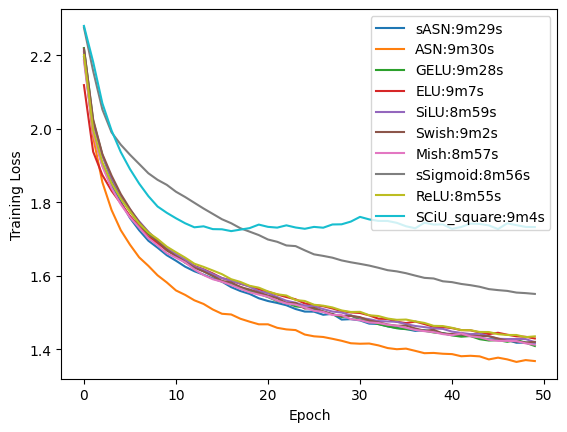

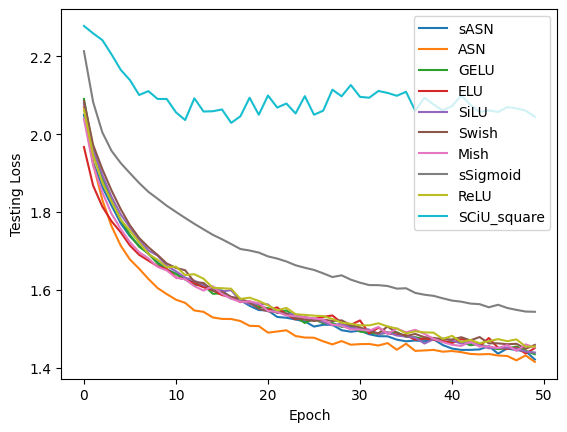

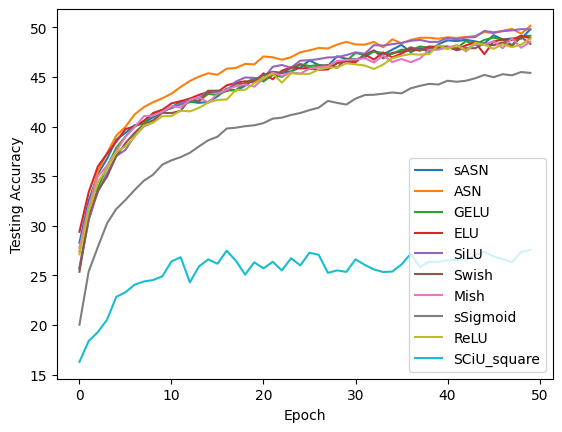

In [10]:
# model : BasicMLP
model_kwargs = {
    'input_size': 3*32*32,
    'hidden_size': 76,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar10',model_card.name))

{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 10, 'num_layers': [2, 2, 2, 2]}
{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 10, 'num_layers': [2, 2, 2, 2], 'activation': sASN()}
Training with sASN activation function...
Epoch [1/50], Test Loss: 1.7687, Test Accuracy: 36.11%
Epoch [2/50], Test Loss: 1.4282, Test Accuracy: 48.53%
Epoch [3/50], Test Loss: 1.3374, Test Accuracy: 51.74%
Epoch [4/50], Test Loss: 1.2572, Test Accuracy: 54.98%
Epoch [5/50], Test Loss: 1.2058, Test Accuracy: 57.06%
Epoch [6/50], Test Loss: 1.1808, Test Accuracy: 57.70%
Epoch [7/50], Test Loss: 1.1026, Test Accuracy: 60.87%
Epoch [8/50], Test Loss: 1.0838, Test Accuracy: 61.49%
Epoch [9/50], Test Loss: 1.0632, Test Accuracy: 62.31%
Epoch [10/50], Test Loss: 1.0170, Test Accuracy: 64.18%
Epoch [11/50], Test Loss: 1.0115, Test Accuracy: 64.79%
Epoch [12/50], Test Loss: 0.9568, Test Accuracy: 66.49%
Epoch [13/50], Test Loss: 0.9980, Test Accuracy: 64.85%
Epoch [14/50], 

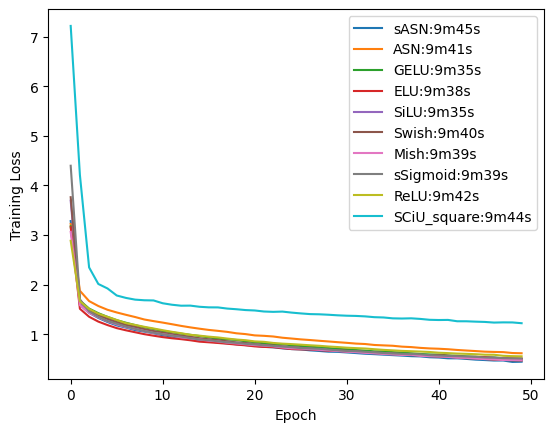

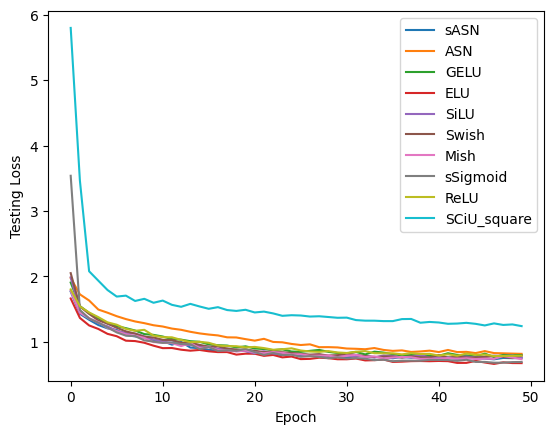

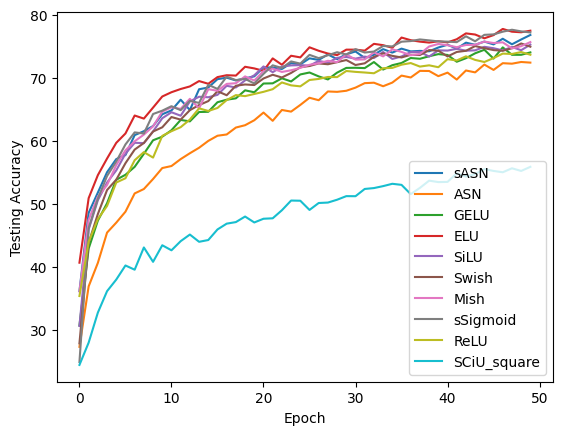

In [8]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 32,
    'in_channel': 3,
    'n_classes': 10,
    'num_layers':[2,2,2,2]
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar10',model_card.name))

### CIFAR100
- class :  0~9 
- shape : (3, 32, 32)
- train : 50,000
- test : 10,000
- transform : toTensor()

In [5]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = CIFAR100(train=True,transform=transform_train)
test_dataset = CIFAR100(train=False,transform=transform_test)


train_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True,num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False,num_workers=2)

{'input_size': 3072, 'hidden_size': 76, 'num_classes': 100}
{'input_size': 3072, 'hidden_size': 76, 'num_classes': 100, 'activation': sASN()}
Training with sASN activation function...
Epoch [1/50], Test Loss: 4.1682, Test Accuracy: 7.50%
Epoch [2/50], Test Loss: 3.9552, Test Accuracy: 10.03%
Epoch [3/50], Test Loss: 3.8381, Test Accuracy: 11.32%
Epoch [4/50], Test Loss: 3.7734, Test Accuracy: 12.96%
Epoch [5/50], Test Loss: 3.7041, Test Accuracy: 14.11%
Epoch [6/50], Test Loss: 3.6773, Test Accuracy: 15.09%
Epoch [7/50], Test Loss: 3.6180, Test Accuracy: 15.99%
Epoch [8/50], Test Loss: 3.5829, Test Accuracy: 16.57%
Epoch [9/50], Test Loss: 3.5678, Test Accuracy: 16.99%
Epoch [10/50], Test Loss: 3.5391, Test Accuracy: 17.58%
Epoch [11/50], Test Loss: 3.5096, Test Accuracy: 18.18%
Epoch [12/50], Test Loss: 3.4976, Test Accuracy: 18.19%
Epoch [13/50], Test Loss: 3.4740, Test Accuracy: 18.60%
Epoch [14/50], Test Loss: 3.4515, Test Accuracy: 19.10%
Epoch [15/50], Test Loss: 3.4538, Test Acc

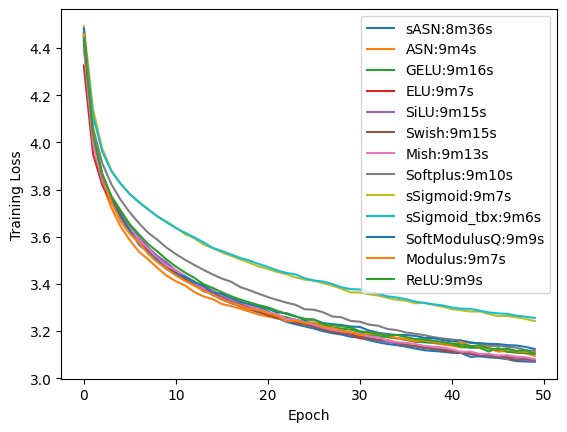

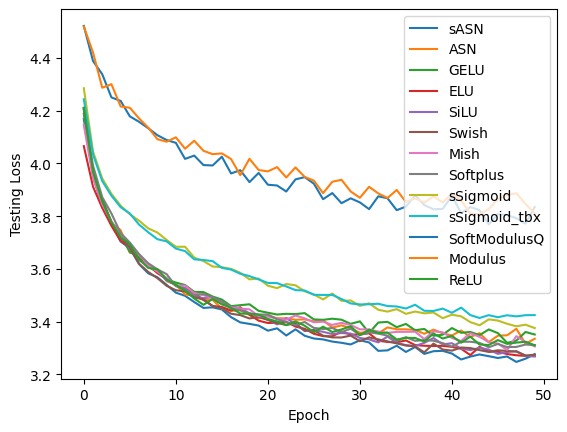

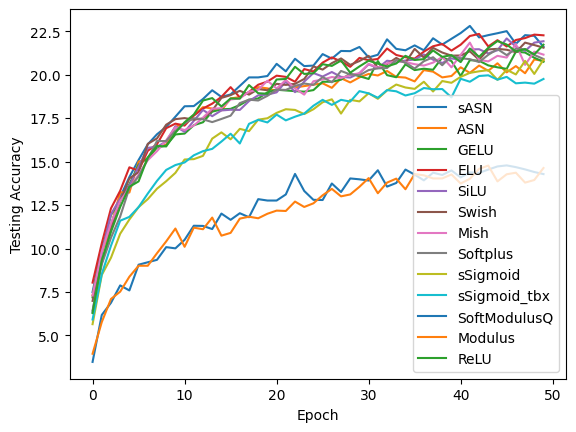

In [8]:
# model : BasicMLP
model_kwargs = {
    'input_size': 3*32*32,
    'hidden_size': 76,
    'num_classes': 100
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar100',model_card.name))

{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'num_layers': [2, 2, 2, 2]}
{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'num_layers': [2, 2, 2, 2], 'activation': sASN()}
Training with sASN activation function...
Epoch [1/50], Test Loss: 5.0938, Test Accuracy: 8.17%
Epoch [2/50], Test Loss: 3.7596, Test Accuracy: 14.63%
Epoch [3/50], Test Loss: 3.4676, Test Accuracy: 18.03%
Epoch [4/50], Test Loss: 3.3030, Test Accuracy: 21.14%
Epoch [5/50], Test Loss: 3.1857, Test Accuracy: 23.23%
Epoch [6/50], Test Loss: 3.0470, Test Accuracy: 26.11%
Epoch [7/50], Test Loss: 2.9422, Test Accuracy: 27.57%
Epoch [8/50], Test Loss: 2.8748, Test Accuracy: 28.80%
Epoch [9/50], Test Loss: 2.8043, Test Accuracy: 30.09%
Epoch [10/50], Test Loss: 2.7226, Test Accuracy: 31.56%
Epoch [11/50], Test Loss: 2.6554, Test Accuracy: 32.46%
Epoch [12/50], Test Loss: 2.6153, Test Accuracy: 33.48%
Epoch [13/50], Test Loss: 2.5604, Test Accuracy: 35.16%
Epoch [14/50],

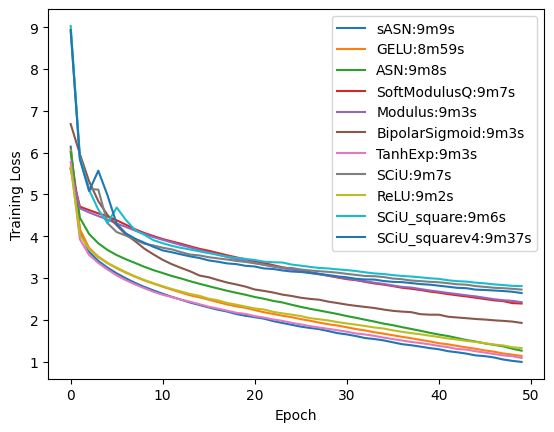

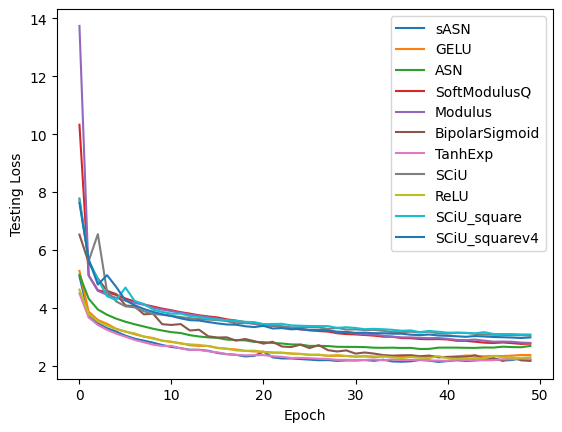

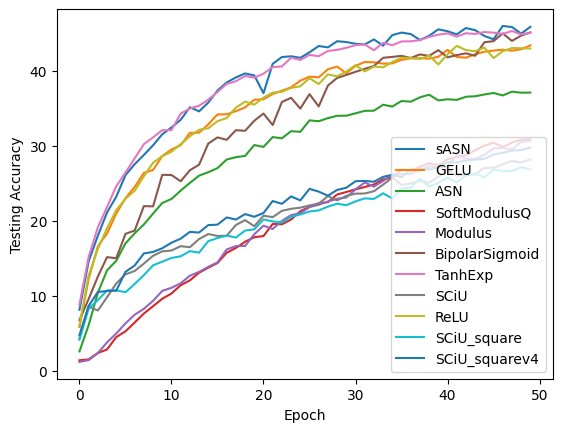

In [11]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 32,
    'in_channel': 3,
    'n_classes': 100,
    'num_layers':[2,2,2,2],
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar100',model_card.name))


{'name': 'gMLP', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'patch_size': 16, 'dim': 256, 'depth': 18}
{'name': 'gMLP', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'patch_size': 16, 'dim': 256, 'depth': 18, 'activation': sASN()}
Training with sASN activation function...


Epoch [1/50], Test Loss: 4.1498, Test Accuracy: 7.08%
Epoch [2/50], Test Loss: 4.0169, Test Accuracy: 8.52%
Epoch [3/50], Test Loss: 3.8905, Test Accuracy: 10.54%
Epoch [4/50], Test Loss: 3.7838, Test Accuracy: 12.55%
Epoch [5/50], Test Loss: 3.6928, Test Accuracy: 13.73%
Epoch [6/50], Test Loss: 3.6235, Test Accuracy: 14.99%
Epoch [7/50], Test Loss: 3.5540, Test Accuracy: 15.93%
Epoch [8/50], Test Loss: 3.5049, Test Accuracy: 16.87%
Epoch [9/50], Test Loss: 3.4096, Test Accuracy: 18.46%
Epoch [10/50], Test Loss: 3.3682, Test Accuracy: 19.92%
Epoch [11/50], Test Loss: 3.3203, Test Accuracy: 20.20%
Epoch [12/50], Test Loss: 3.2765, Test Accuracy: 21.11%
Epoch [13/50], Test Loss: 3.2382, Test Accuracy: 21.75%
Epoch [14/50], Test Loss: 3.1914, Test Accuracy: 22.31%
Epoch [15/50], Test Loss: 3.1667, Test Accuracy: 23.82%
Epoch [16/50], Test Loss: 3.1226, Test Accuracy: 24.15%
Epoch [17/50], Test Loss: 3.1146, Test Accuracy: 24.37%
Epoch [18/50], Test Loss: 3.0738, Test Accuracy: 24.25%
Epo

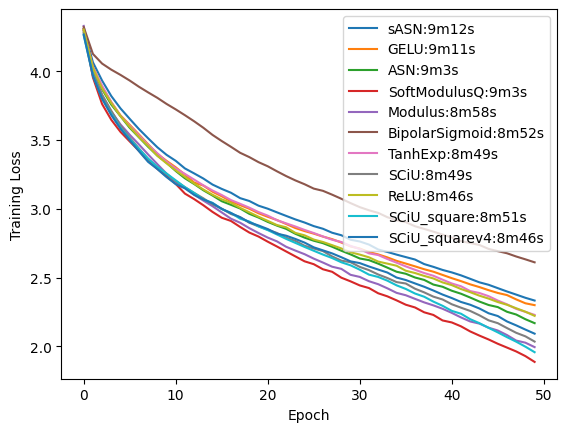

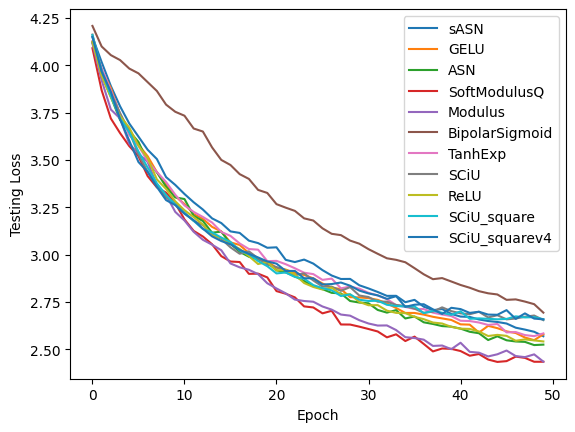

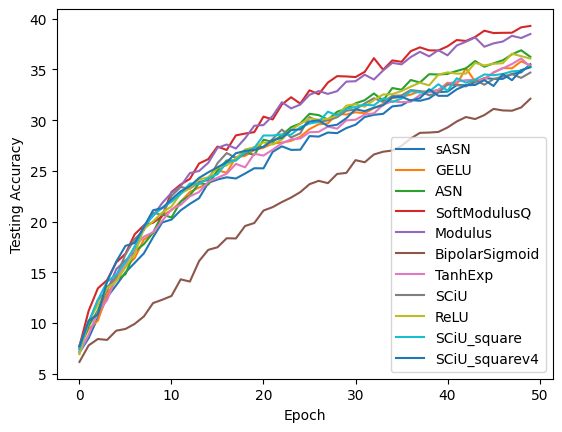

In [12]:
# model : gMLP
model_kwargs = {
    'name':'gMLP',
    'input_size': 32,
    'in_channel': 3,
    'n_classes': 100,
    'patch_size':16,
    'dim':256,
    'depth':18
}

model_card = ModelCard(gMlpVision,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar100_gMLP',model_card.name))
